# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [364]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
# Shape
df_data.shape

(962, 16)

In [7]:
# Column names
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [16]:
# First nobel prize winner
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name  birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [15]:
# Latest winner of nobel prize
df_data.tail(1)

year category                            prize  \
961  2020  Physics  The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
961  “for the discovery that black hole formation i...         1/2   

    laureate_type      full_name  birth_date  birth_city   birth_country  \
961    Individual  Roger Penrose  1931-08-08  Colchester  United Kingdom   

    birth_country_current   sex     organization_name organization_city  \
961        United Kingdom  Male  University of Oxford            Oxford   

    organization_country  ISO  
961       United Kingdom  GBR

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [18]:
# Duplicate values
df_data.duplicated().values.any()

False

### Check for NaN Values

In [19]:
# Get the columns with NaN values
df_data.isna().sum().sort_values(ascending=False)

organization_name        255
organization_city        255
organization_country     254
motivation                88
birth_city                31
birth_date                28
birth_country             28
birth_country_current     28
sex                       28
ISO                       28
year                       0
category                   0
prize                      0
prize_share                0
laureate_type              0
full_name                  0
dtype: int64

In [21]:
# Reason for NaN values
col_subset = ['year', 'full_name', 'sex', 'birth_country', 'organization_name', 'laureate_type']
df_data.loc[df_data['birth_date'].isna()][col_subset]

# Reason: Non-association with an organization

year                                          full_name  sex  \
24   1904  Institut de droit international (Institute of ...  NaN   
60   1910  Bureau international permanent de la Paix (Per...  NaN   
89   1917  Comité international de la Croix Rouge (Intern...  NaN   
200  1938  Office international Nansen pour les Réfugiés ...  NaN   
215  1944  Comité international de la Croix Rouge (Intern...  NaN   
237  1947   American Friends Service Committee (The Quakers)  NaN   
238  1947              Friends Service Council (The Quakers)  NaN   
283  1954  Office of the United Nations High Commissioner...  NaN   
348  1963  Comité international de la Croix Rouge (Intern...  NaN   
349  1963  Ligue des Sociétés de la Croix-Rouge (League o...  NaN   
366  1965            United Nations Children's Fund (UNICEF)  NaN   
399  1969         International Labour Organization (I.L.O.)  NaN   
479  1977                              Amnesty International  NaN   
523  1981  Office of the United Nations High Commissioner...  NaN   
558  1985  International Physicians for the Prevention of...  NaN   
588  1988                 United Nations Peacekeeping Forces  NaN   
659  1995   Pugwash Conferences on Science and World Affairs  NaN   
682  1997     International Campaign to Ban Landmines (ICBL)  NaN   
703  1999                           Médecins Sans Frontières  NaN   
730  2001                              United Nations (U.N.)  NaN   
778  2005          International Atomic Energy Agency (IAEA)  NaN   
788  2006                                       Grameen Bank  NaN   
801  2007   Intergovernmental Panel on Climate Change (IPCC)  NaN   
860  2012                                European Union (EU)  NaN   
873  2013  Organisation for the Prohibition of Chemical W...  NaN   
897  2015                          National Dialogue Quartet  NaN   
919  2017  International Campaign to Abolish Nuclear Weap...  NaN   
958  2020                         World Food Programme (WFP)  NaN   

    birth_country organization_name laureate_type  
24            NaN               NaN  Organization  
60            NaN               NaN  Organization  
89            NaN               NaN  Organization  
200           NaN               NaN  Organization  
215           NaN               NaN  Organization  
237           NaN               NaN  Organization  
238           NaN               NaN  Organization  
283           NaN               NaN  Organization  
348           NaN               NaN  Organization  
349           NaN               NaN  Organization  
366           NaN               NaN  Organization  
399           NaN               NaN  Organization  
479           NaN               NaN  Organization  
523           NaN               NaN  Organization  
558           NaN               NaN  Organization  
588           NaN               NaN  Organization  
659           NaN               NaN  Organization  
682           NaN               NaN  Organization  
703           NaN               NaN  Organization  
730           NaN               NaN  Organization  
778           NaN               NaN  Organization  
788           NaN               NaN  Organization  
801           NaN               NaN  Organization  
860           NaN               NaN  Organization  
873           NaN               NaN  Organization  
897           NaN               NaN  Organization  
919           NaN               NaN  Organization  
958           NaN               NaN  Organization

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [29]:
# birth_date column's datatype to datetime
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [31]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [37]:
# Add a column with percentage share of prizes
separated_values = df_data['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data['prize_share_percentage'] = (numerator/denominator) * 100

In [38]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  prize_share_percentage  
0            Berlin              Germany  NLD                  100.00  
1               NaN                  NaN  FRA                  100.00  
2           Marburg              Germany  POL                  100.00  
3               NaN                  NaN  FRA                   50.00  
4               NaN                  NaN  CHE                   50.00

In [39]:
df_data.dtypes

year                               int64
category                          object
prize                             object
motivation                        object
prize_share                       object
laureate_type                     object
full_name                         object
birth_date                datetime64[ns]
birth_city                        object
birth_country                     object
birth_country_current             object
sex                               object
organization_name                 object
organization_city                 object
organization_country              object
ISO                               object
prize_share_percentage           float64
dtype: object

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [44]:
gender = df_data['sex'].value_counts()

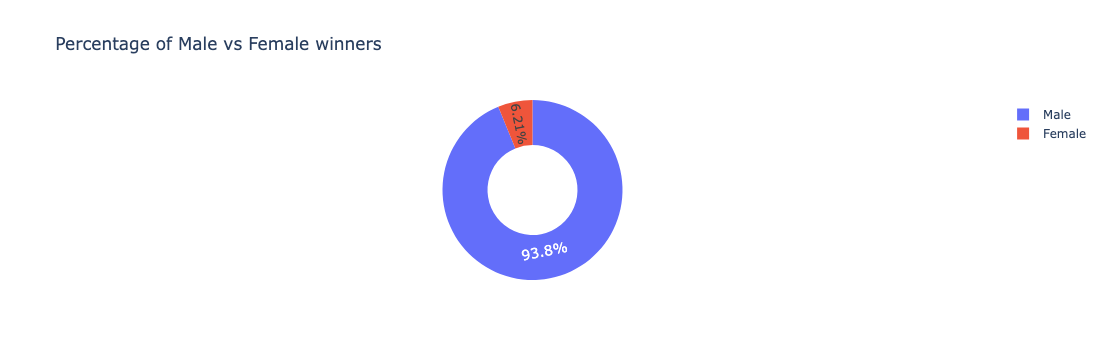

In [49]:
fig = px.pie(
    labels=gender.index,
    values=gender.values,
    title='Percentage of Male vs Female winners',
    names=gender.index,
    hole=0.5
)

fig.update_traces(
    textposition='inside',
    textfont_size=14,
    textinfo='percent'
)

fig.show();

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [50]:
# Names of first 3 female winners
df_data[df_data['sex']=='Female'].head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  prize_share_percentage  
18                  NaN  POL                   25.00  
29                  NaN  CZE                  100.00  
51                  NaN  SWE                  100.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [53]:
# Winners with multiple nobel prizes
winners = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[winners]

In [54]:
multiple_winners

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [57]:
# No. of categories of laureates
df_data['category'].nunique()

6

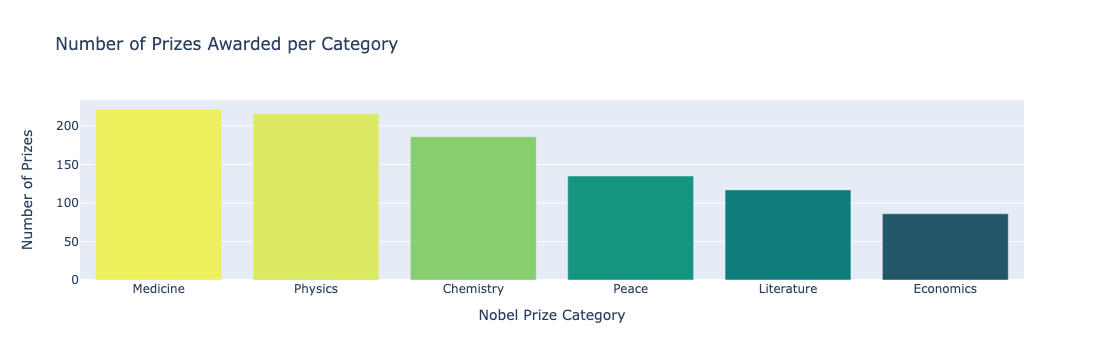

In [59]:
prizes_per_category = df_data['category'].value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show();

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [60]:
# First prize given in field of economics
df_data[df_data['category']=='Economics'].head(1)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  prize_share_percentage  
393         Rotterdam          Netherlands  NLD                   50.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [62]:
men_vs_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
men_vs_women.sort_values('prize', ascending=False, inplace=True)

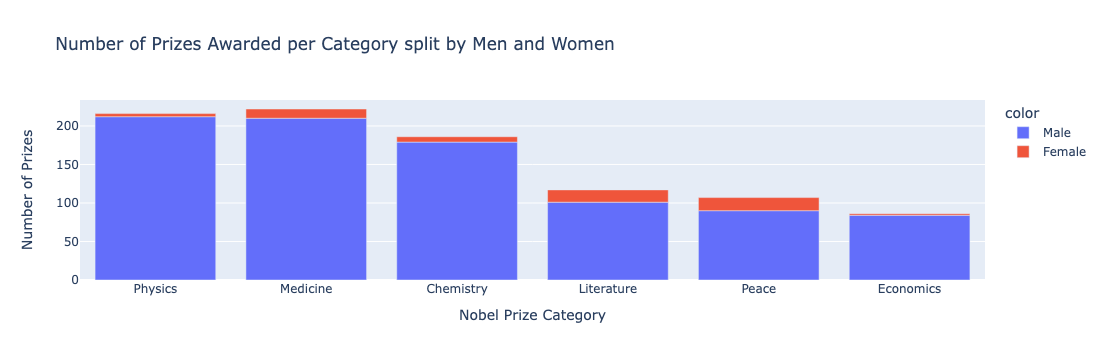

In [65]:
v_bar_split = px.bar(x = men_vs_women.category,
                     y = men_vs_women.prize,
                     color = men_vs_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show();

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [281]:
df_data.sample()

year category                            prize  \
649  1994  Physics  The Nobel Prize in Physics 1994   

                                            motivation prize_share  \
649  "for pioneering contributions to the developme...         1/2   

    laureate_type          full_name birth_date      birth_city  \
649    Individual  Clifford G. Shull 1915-09-23  Pittsburgh, PA   

                birth_country     birth_country_current   sex  \
649  United States of America  United States of America  Male   

                               organization_name organization_city  \
649  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  prize_share_percentage  
649  United States of America  USA                   50.00

In [71]:
# No. of prizes awarded every year
prizes_per_year = df_data.groupby('year').agg({'prize': pd.Series.count})
prizes_per_year

prize
year       
1901      6
1902      7
1903      7
1904      6
1905      5
...     ...
2016     11
2017     12
2018     13
2019     14
2020     12

[117 rows x 1 columns]

In [73]:
# 5 year rolling average of the number of prizes
moving_avg = prizes_per_year.rolling(window=5).mean()
moving_avg

prize
year       
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
...     ...
2016  11.60
2017  12.00
2018  12.00
2019  12.20
2020  12.40

[117 rows x 1 columns]

In [100]:
# Superimpose the rolling average on a scatter plot
plt.figure(figsize=(14, 8), dpi=1000)

plt.scatter(
    x=prizes_per_year.index,
    y=prizes_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=150
)

plt.xticks(
    ticks=np.arange(1900, 2021, 5),
    fontsize=10,
    rotation=50
)

plt.plot(
    prizes_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=2
)

plt.show();

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [109]:
# Average prize share of the winners on a year by year basis
avg_prize_share = df_data.groupby('year').agg({'prize_share_percentage': pd.Series.mean})
avg_prize_share

prize_share_percentage
year                        
1901                   83.33
1902                   71.43
1903                   71.43
1904                   83.33
1905                  100.00
...                      ...
2016                   54.55
2017                   50.00
2018                   46.15
2019                   42.86
2020                   50.00

[117 rows x 1 columns]

In [111]:
moving_prize_share_avg = avg_prize_share.rolling(window=5).mean()
moving_prize_share_avg

prize_share_percentage
year                        
1901                     NaN
1902                     NaN
1903                     NaN
1904                     NaN
1905                   81.90
...                      ...
2016                   52.28
2017                   50.28
2018                   50.28
2019                   49.62
2020                   48.71

[117 rows x 1 columns]

In [142]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=15)

plt.xticks(
    ticks=np.arange(1900, 2021, 5),
    fontsize=10,
    rotation=50
)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2021)
ax1.set_ylim(2, 16)
ax2.set_ylim(0, 100)

ax1.scatter(
    x=prizes_per_year.index,
    y=prizes_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=150
)

ax1.plot(
    prizes_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=2
)

ax2.plot(
    prizes_per_year.index,
    moving_prize_share_avg.values,
    c='gray',
    linewidth=3
)

plt.show();

In [143]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=15)

plt.xticks(
    ticks=np.arange(1900, 2021, 5),
    fontsize=10,
    rotation=50
)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2021)
ax1.set_ylim(2, 16)
ax2.set_ylim(0, 100)

ax2.invert_yaxis()

ax1.scatter(
    x=prizes_per_year.index,
    y=prizes_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=150
)

ax1.plot(
    prizes_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=2
)

ax2.plot(
    prizes_per_year.index,
    moving_prize_share_avg.values,
    c='gray',
    linewidth=3
)

plt.show();

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [280]:
df_data.sample()

year category                            prize  \
790  2006  Physics  The Nobel Prize in Physics 2006   

                                            motivation prize_share  \
790  "for their discovery of the blackbody form and...         1/2   

    laureate_type        full_name birth_date birth_city  \
790    Individual  George F. Smoot 1945-02-20  Yukon, FL   

                birth_country     birth_country_current   sex  \
790  United States of America  United States of America  Male   

            organization_name organization_city      organization_country  \
790  University of California      Berkeley, CA  United States of America   

     ISO  prize_share_percentage  
790  USA                   50.00

In [226]:
# Top 20 countries
top_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
top_20_countries = top_countries.sort_values(by='prize', ascending=False)[:20]
top_20_countries = top_20_countries[::-1]

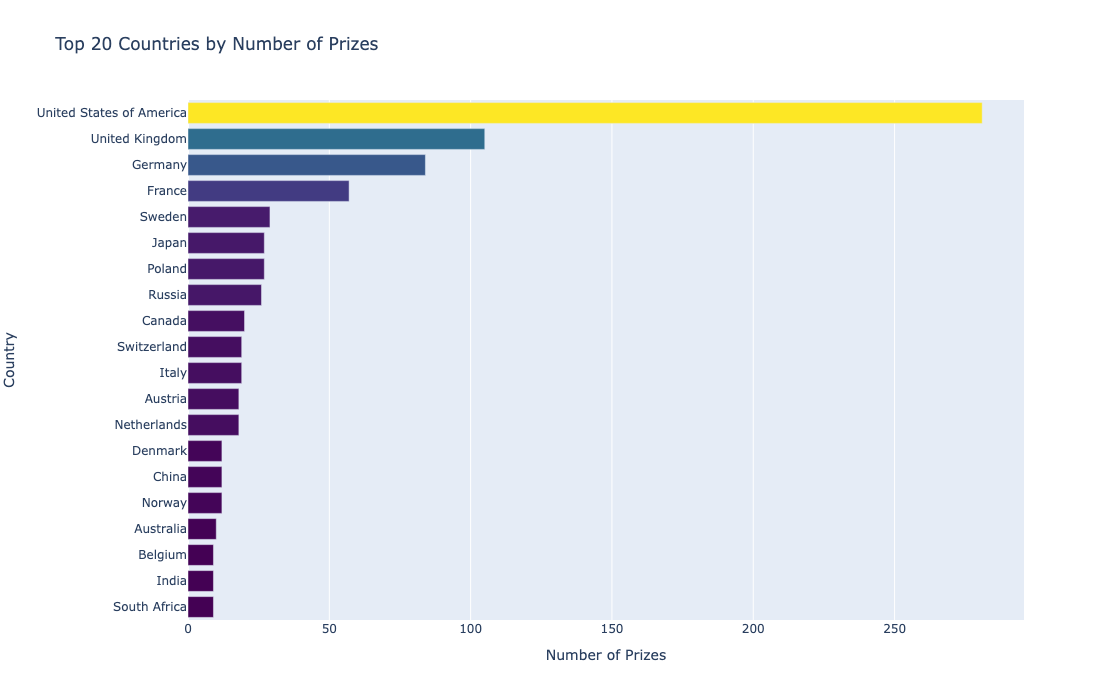

In [227]:

h_bar = px.bar(x=top_20_countries.prize,
               y=top_20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

# Resize the plot
h_bar.update_layout(width=1100, height=700)

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [218]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
df_countries.head()

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29

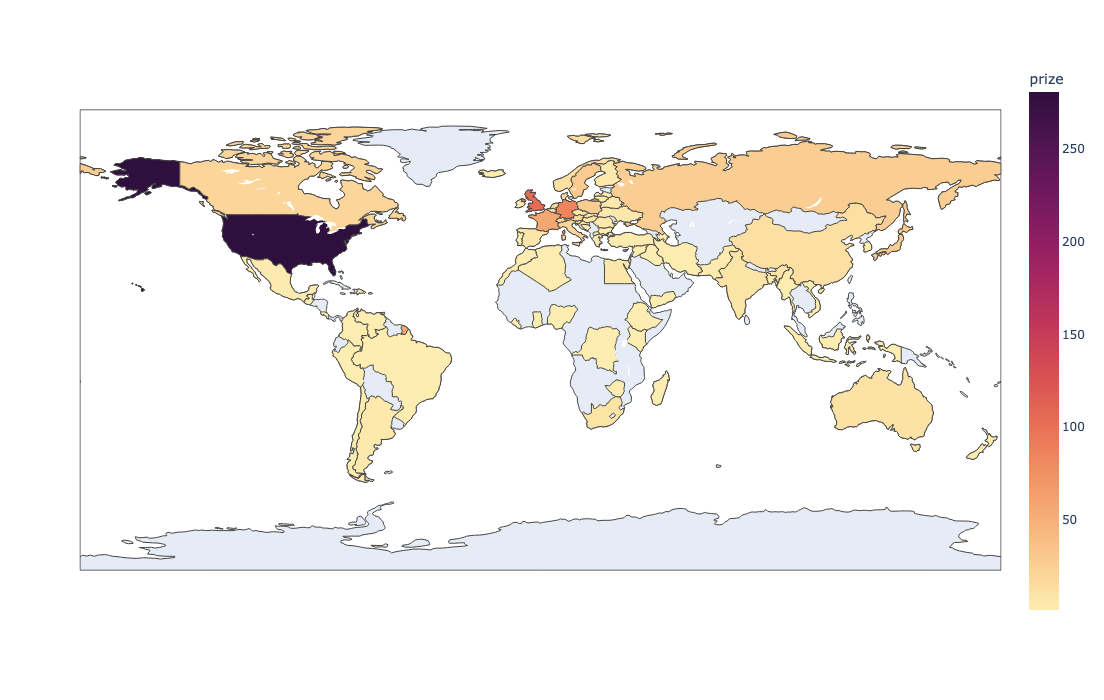

In [222]:
world_map = px.choropleth(
    df_countries,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter
)
 
world_map.update_layout(width=1100, height=700, coloraxis_showscale=True)

world_map.show();

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [223]:
country_category_prize_distribution = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
country_category_prize_distribution

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

In [248]:
merged_df = pd.merge(country_category_prize_distribution, top_20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', ascending=False, inplace=True)
merged_df.head(10)

merged_df = merged_df[::-1]

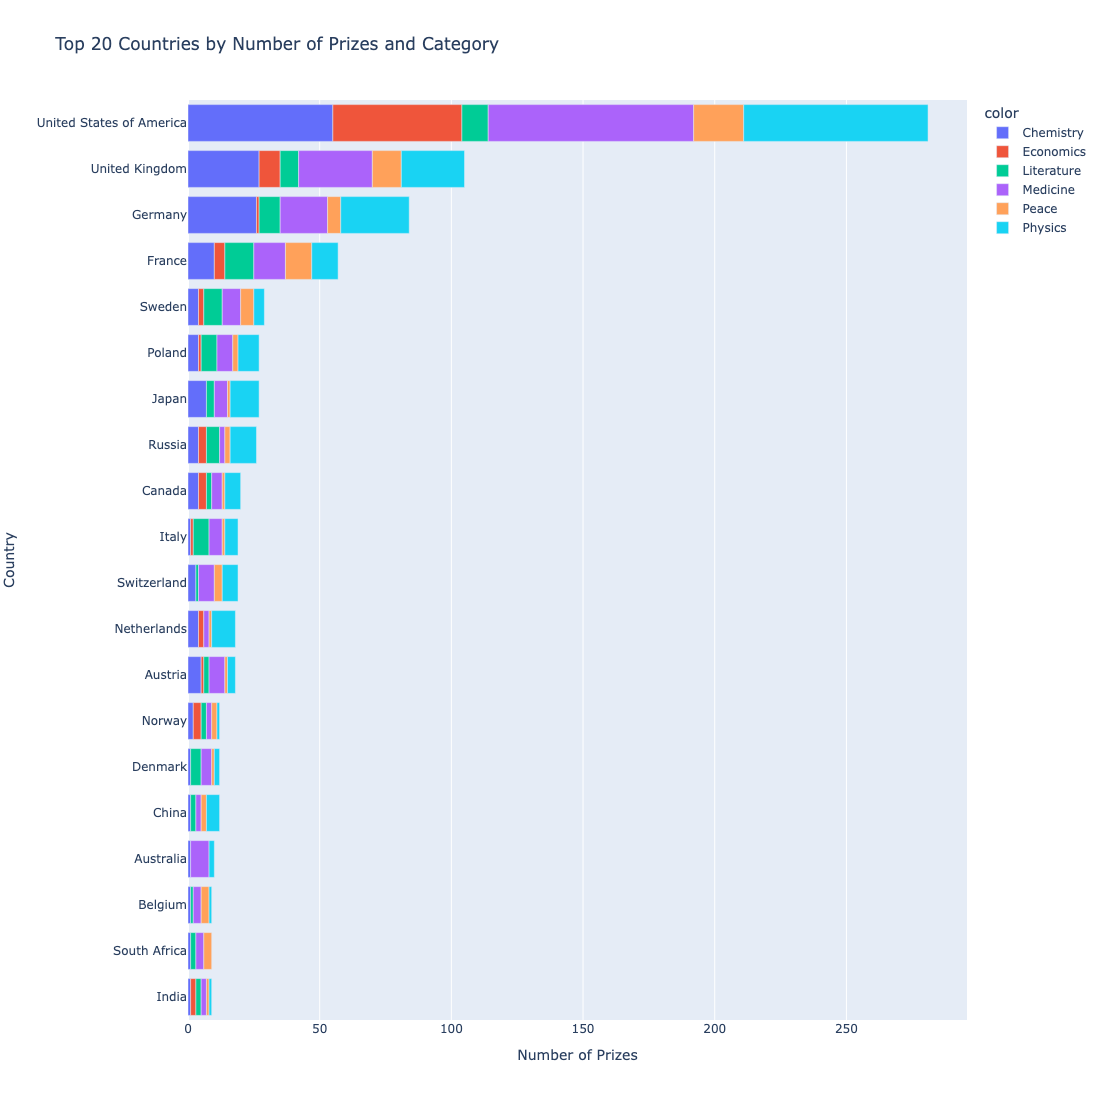

In [255]:
cat_country_bar = px.bar(
    x=merged_df.cat_prize,
    y=merged_df.birth_country_current,
    orientation='h',
    color=merged_df.category,
    title='Top 20 Countries by Number of Prizes and Category'
)

cat_country_bar.update_layout(width=1100, height=1100, xaxis_title='Number of Prizes', yaxis_title='Country')

cat_country_bar.show();

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [279]:
df_data.sample()

year   category                              prize  \
272  1953  Chemistry  The Nobel Prize in Chemistry 1953   

                                            motivation prize_share  \
272  "for his discoveries in the field of macromole...         1/1   

    laureate_type           full_name birth_date birth_city birth_country  \
272    Individual  Hermann Staudinger 1881-03-23      Worms       Germany   

    birth_country_current   sex       organization_name organization_city  \
272               Germany  Male  University of Freiburg          Breisgau   

    organization_country  ISO  prize_share_percentage  
272              Germany  DEU                  100.00

In [261]:
prizes_over_time = df_data.groupby(['birth_country_current', 'year'], as_index=False).agg({'prize': pd.Series.count})
prizes_over_time = prizes_over_time.sort_values('year')[['year', 'birth_country_current', 'prize']]
prizes_over_time

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [264]:
cumulative_prizes = prizes_over_time.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

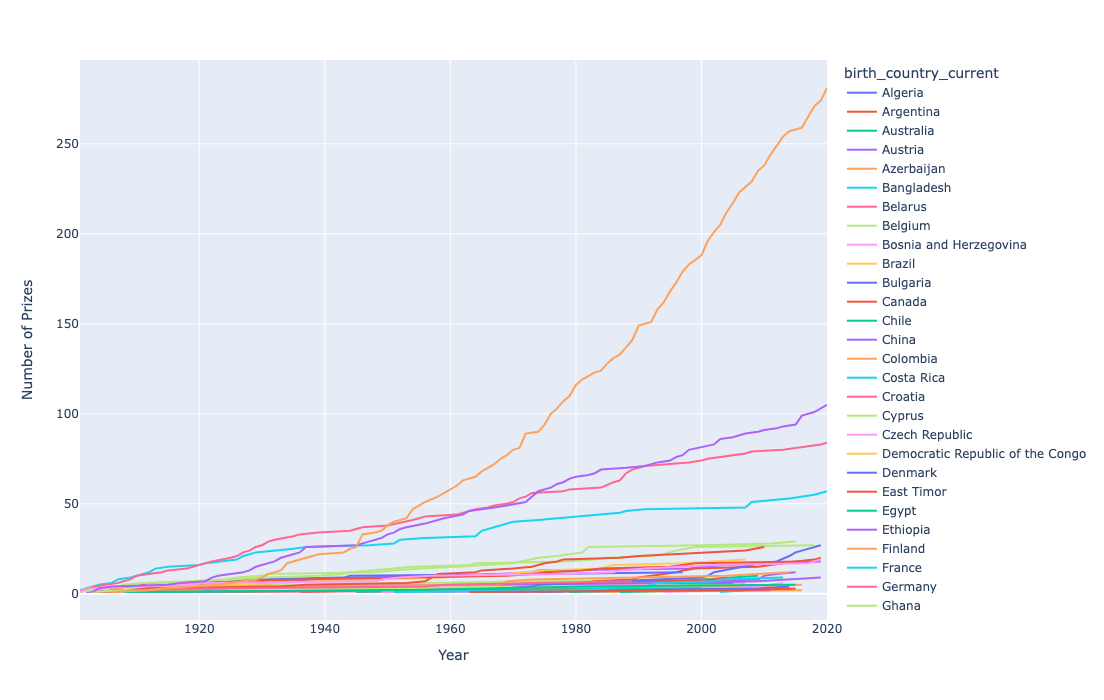

In [267]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Prizes',
    width=1100,
    height=700
)
 
l_chart.show();

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [278]:
df_data.sample()

year category                            prize  \
696  1998  Physics  The Nobel Prize in Physics 1998   

                                            motivation prize_share  \
696  "for their discovery of a new form of quantum ...         1/3   

    laureate_type       full_name birth_date birth_city birth_country  \
696    Individual  Daniel C. Tsui 1939-02-28      Henan         China   

    birth_country_current   sex     organization_name organization_city  \
696                 China  Male  Princeton University     Princeton, NJ   

         organization_country  ISO  prize_share_percentage  
696  United States of America  CHN                   33.33

In [274]:
top_research_organisations = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
top_20_research_organisations = top_research_organisations[:20]
top_20_research_organisations = top_20_research_organisations[::-1]

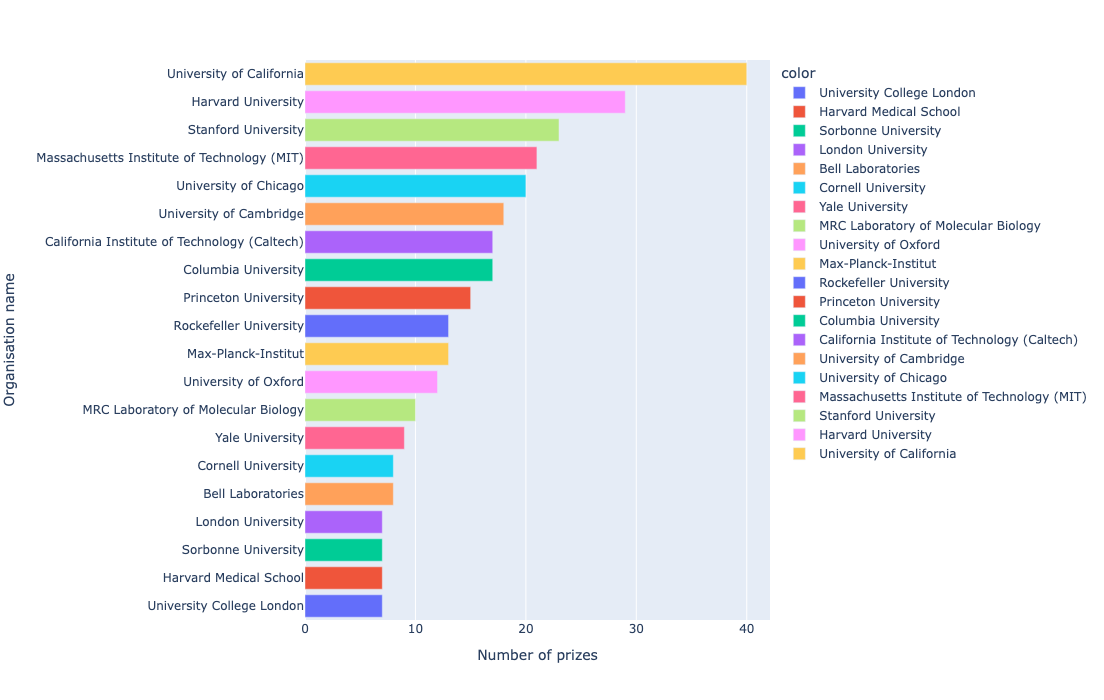

In [276]:
org_bar = px.bar(
    x=top_20_research_organisations.prize,
    y=top_20_research_organisations.organization_name,
    orientation='h',
    color=top_20_research_organisations.organization_name
)

org_bar.update_layout(
    width=1100, 
    height=700,
    xaxis_title='Number of prizes',
    yaxis_title='Organisation name'
)

org_bar.show();

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [277]:
df_data.sample()

year category                            prize  \
569  1986  Physics  The Nobel Prize in Physics 1986   

                                            motivation prize_share  \
569  "for their design of the scanning tunneling mi...         1/4   

    laureate_type    full_name birth_date             birth_city  \
569    Individual  Gerd Binnig 1947-07-20  Frankfurt-on-the-Main   

              birth_country birth_country_current   sex  \
569  West Germany (Germany)               Germany  Male   

                  organization_name organization_city organization_country  \
569  IBM Zurich Research Laboratory        Rüschlikon          Switzerland   

     ISO  prize_share_percentage  
569  DEU                   25.00

In [287]:
top_cities = df_data.groupby(['organization_city'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
top_20_cities = top_cities[:20]
top_20_cities = top_20_cities[::-1]
top_20_cities

organization_city  prize
65          Göttingen      8
78         Ithaca, NY      8
119     New Haven, CT      9
23         Boston, MA      9
110            Munich      9
71         Heidelberg      9
108            Moscow     10
157         Stockholm     10
13             Berlin     12
126            Oxford     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

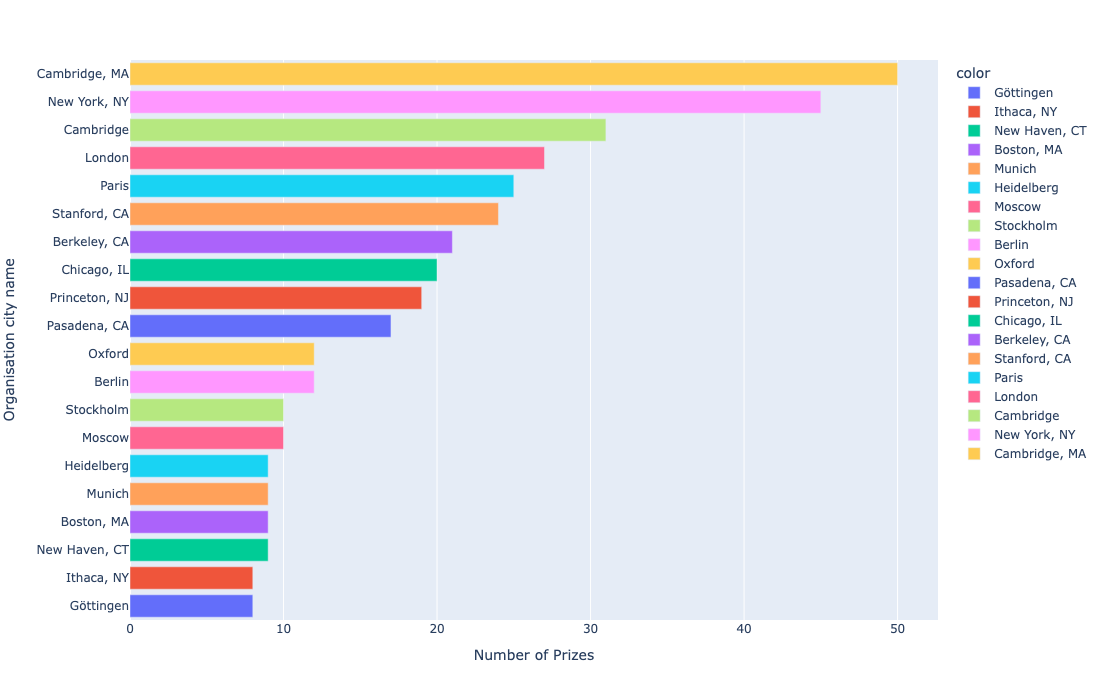

In [290]:
top_cities_bar = px.bar(
    x=top_20_cities.prize,
    y=top_20_cities.organization_city,
    orientation='h',
    color=top_20_cities.organization_city
)

top_cities_bar.update_layout(
    width=1100,
    height=700,
    xaxis_title='Number of Prizes',
    yaxis_title='Organisation city name'
)

top_cities_bar.show();

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [292]:
top_birth_cities = df_data.groupby(['birth_city'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
top_20_birth_cities = top_birth_cities[:20]
top_20_birth_cities = top_20_birth_cities[::-1]
top_20_birth_cities

birth_city  prize
92           Cambridge, MA      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
210                Hamburg      6
515              Stockholm      6
358                 Moscow      7
363                 Munich      7
64              Boston, MA      8
80                Budapest      8
76            Brooklyn, NY      8
590         Washington, DC      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

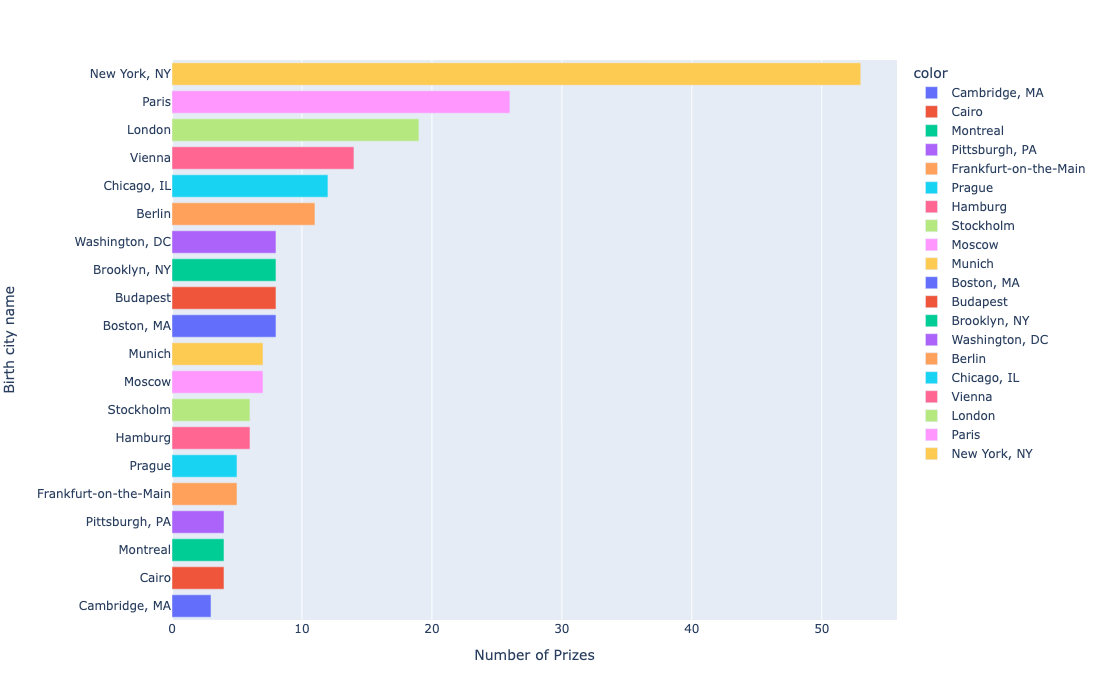

In [300]:
top_birth_cities_bar = px.bar(
    x=top_20_birth_cities.prize,
    y=top_20_birth_cities.birth_city,
    orientation='h',
    color=top_20_birth_cities.birth_city
)

top_birth_cities_bar.update_layout(
    width=1100,
    height=700,
    xaxis_title='Number of Prizes',
    yaxis_title='Birth city name'
)

top_birth_cities_bar.show();

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [301]:
df_data.sample()

year category                            prize  \
626  1992  Physics  The Nobel Prize in Physics 1992   

                                            motivation prize_share  \
626  "for his invention and development of particle...         1/1   

    laureate_type        full_name birth_date birth_city birth_country  \
626    Individual  Georges Charpak 1924-08-01  Dabrovica        Poland   

    birth_country_current   sex                       organization_name  \
626                Poland  Male  École Supérieure de Physique et Chimie   

    organization_city organization_country  ISO  prize_share_percentage  
626             Paris               France  POL                  100.00

In [304]:
prizes_by_organisation = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
prizes_by_organisation

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize  
0                   Institute for Biochemical Research      1  
1    Instituto de Biologia y Medicina Experimental ...      1  
2                       Australian National University      1  
3    Walter and Eliza Hall Institute for Medical Re...      1  
4    NHMRC Helicobacter pylori Research Laboratory,...      1  
..                                                 ...    ...  
286                                  Purdue University      2  
287                                            Du Pont      1  
288                 Marine Biological Laboratory (MBL)      1  
289         University of Massachusetts Medical School      1  
290               IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [307]:
prize_burst = px.sunburst(
    prizes_by_organisation,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Number of prizes by organisation'
)

prize_burst.update_layout(
    width=1100,
    height=700,
    coloraxis_showscale=False
)

prize_burst.show();

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [308]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  prize_share_percentage  
0            Berlin              Germany  NLD                  100.00  
1               NaN                  NaN  FRA                  100.00  
2           Marburg              Germany  POL                  100.00  
3               NaN                  NaN  FRA                   50.00  
4               NaN                  NaN  CHE                   50.00

In [319]:
df_data['year'].dtype

dtype('int64')

In [321]:
# Get year out of the birth date
int(str(df_data['birth_date'][0]).split(' ')[0].split('-')[0])

1852

In [351]:
# Add 'age' column to the df_data 
df_data['winning_age'] = abs(df_data.year - df_data['birth_date'].dt.year)
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  prize_share_percentage   age  \
0            Berlin              Germany  NLD                  100.00 49.00   
1               NaN                  NaN  FRA                  100.00 62.00   
2           Marburg              Germany  POL                  100.00 47.00   
3               NaN                  NaN  FRA                   50.00 79.00   
4               NaN                  NaN  CHE                   50.00 73.00   

   winning_age  
0        49.00  
1        62.00  
2        47.00  
3        79.00  
4        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [353]:
# Oldest and youngest nobel laureate
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  prize_share_percentage   age  winning_age  
937  United States of America  DEU                   33.33 97.00        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  prize_share_percentage   age  winning_age  
885                  NaN  PAK                   50.00 17.00        17.00

In [354]:
df_data.describe()

year                     birth_date  prize_share_percentage    age  \
count   962.00                            934                  962.00 934.00   
mean  1,971.82  1912-03-28 22:50:37.259100672                   62.68  59.95   
min   1,901.00            1817-11-30 00:00:00                   25.00  17.00   
25%   1,948.00            1892-04-06 00:00:00                   33.33  51.00   
50%   1,977.00            1917-10-30 12:00:00                   50.00  60.00   
75%   2,001.00            1937-04-24 18:00:00                  100.00  69.00   
max   2,020.00            1997-07-12 00:00:00                  100.00  97.00   
std      33.81                            NaN                   29.39  12.62   

       winning_age  
count       934.00  
mean         59.95  
min          17.00  
25%          51.00  
50%          60.00  
75%          69.00  
max          97.00  
std          12.62

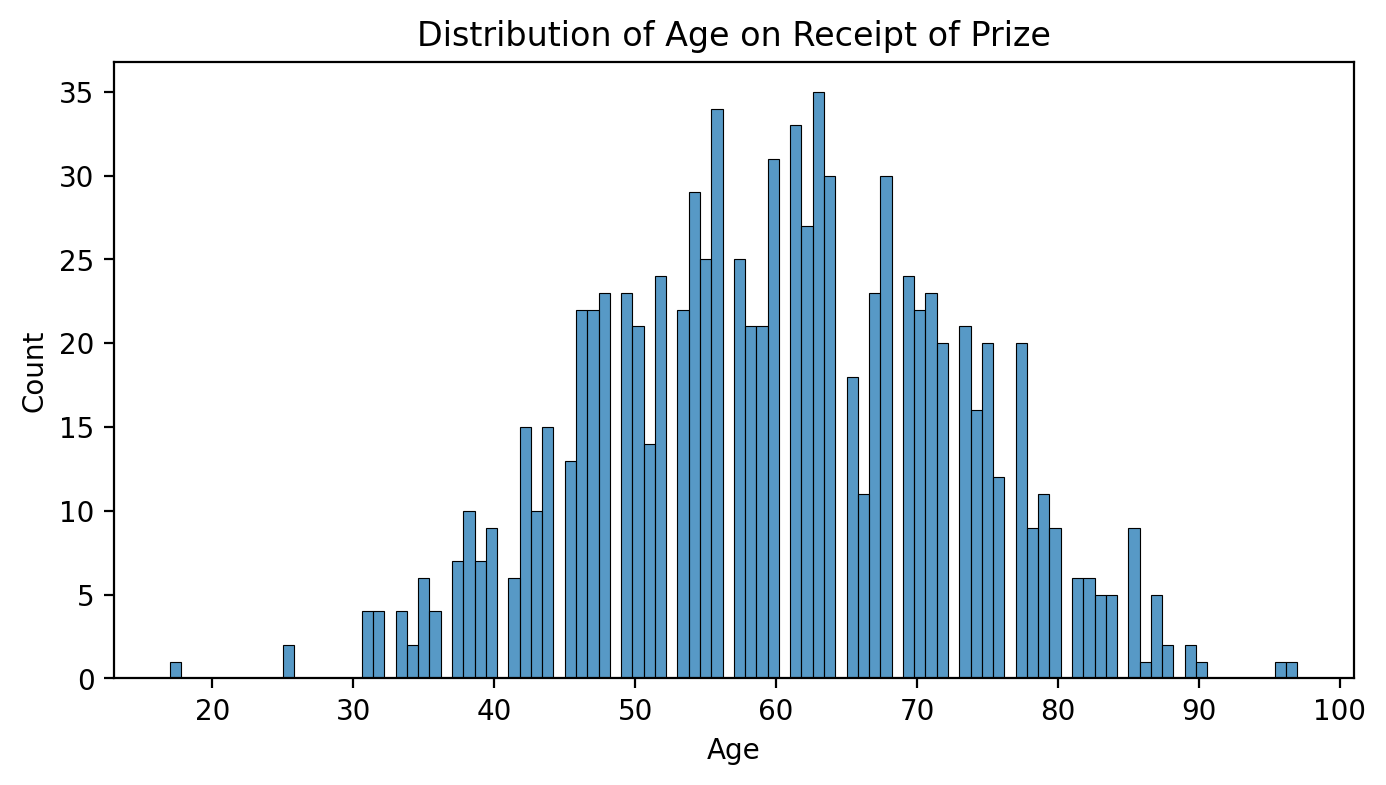

In [369]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=100)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show();

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


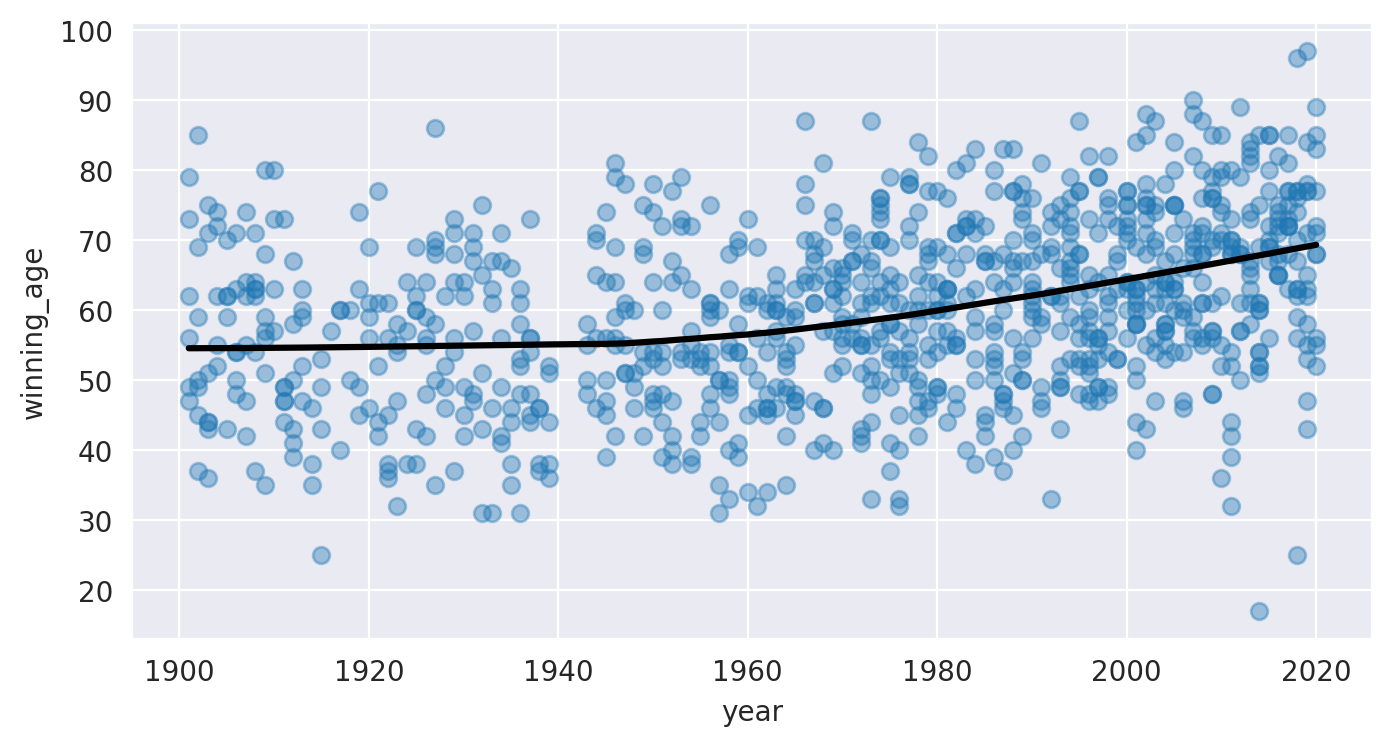

In [372]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show();

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

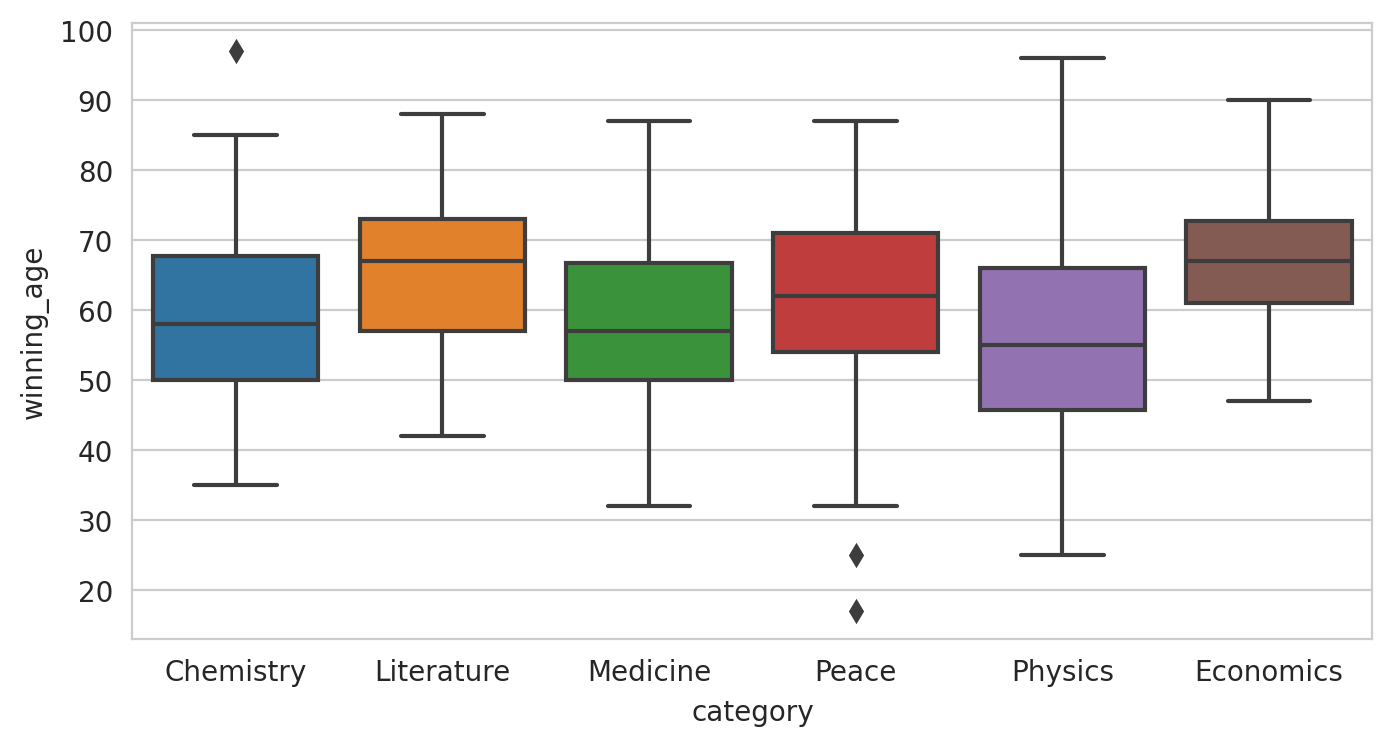

In [373]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show();

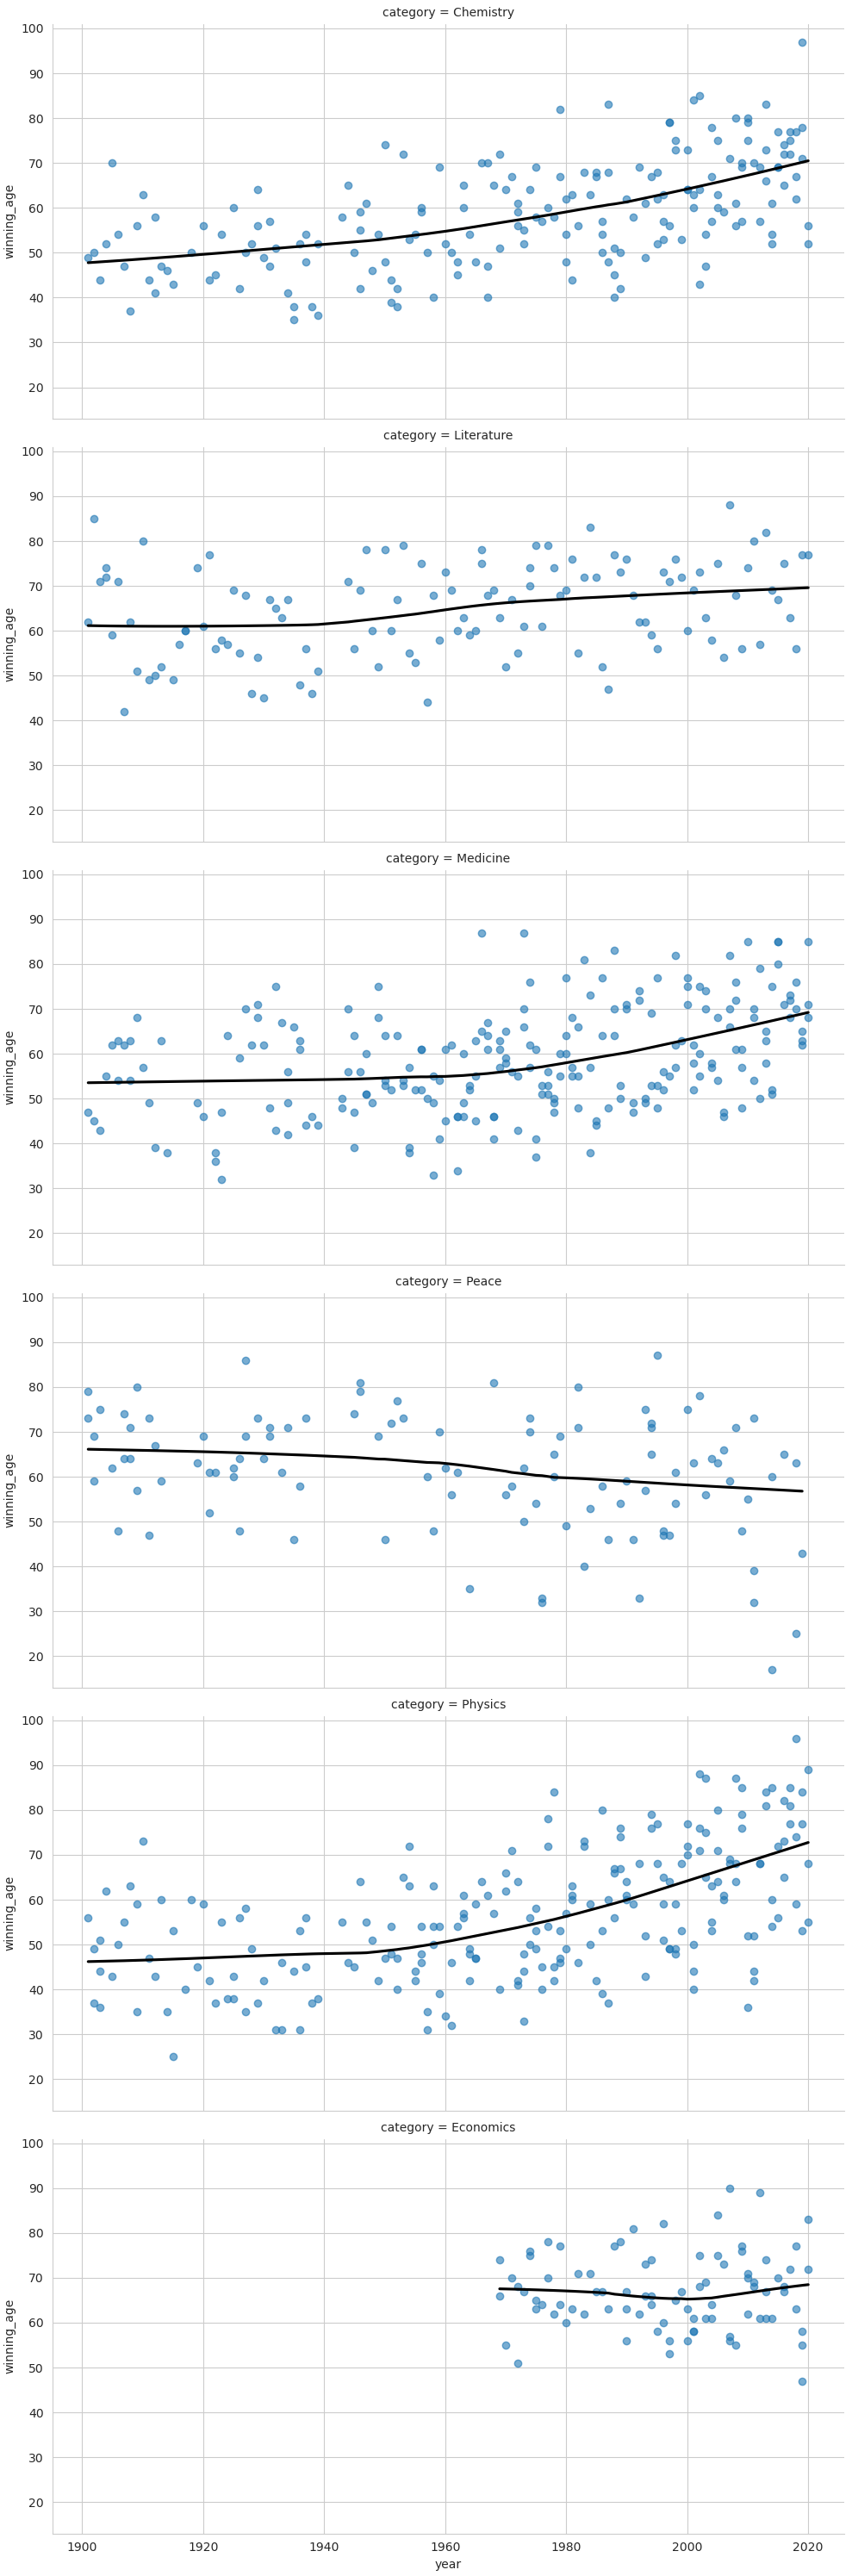

In [377]:
#  Laureate Age over Time by Category
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show();

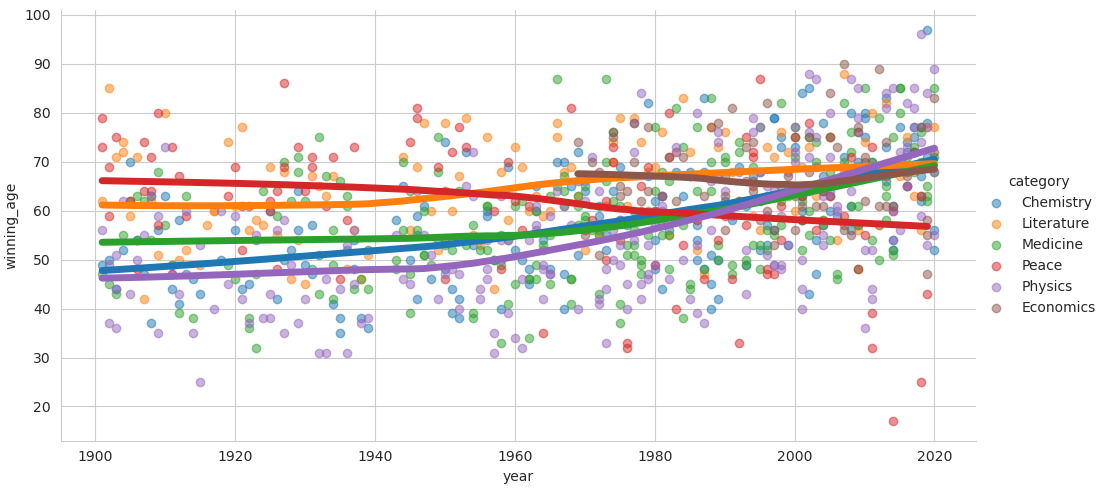

In [378]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show();